### Cartoonifying an Image

In [1]:
#Step-1 Importing libraries

import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store images as it deals with arrays
import imageio #to read the image chosen by the file box using destination path
import sys
import matplotlib.pyplot as plt #used for visualization and plotting
import os #os interaction, read and save the image path
import tkinter as tk #standard GUI library for python
from tkinter import filedialog #contains classes and fun's for creating simple dialogs to get input
from tkinter import *
from PIL import ImageTk, Image #PIL-Python Imaging Library opening, manipulating, and saving many different image file formats
import tkinter.messagebox


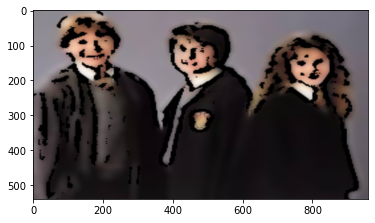

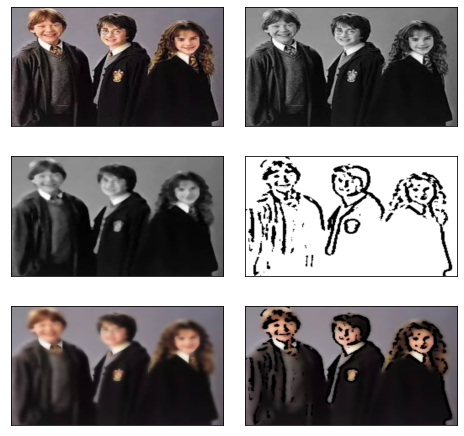

In [2]:
#Step-11 Making the main window

top = tk.Tk()
top.geometry('400x400')
top.title('Cartoonify your image')
top.configure(background = 'white')
label = Label(top, background = '#CDCDCD', font=('calibri', 20, 'bold'))

#Step-2 building a file box to choose a particular file

def upload():
    ImagePath = easygui.fileopenbox()
    cartoonify(ImagePath)

#Step-3 Store the image

def cartoonify(ImagePath):
    
    #read the image
    originalimage = cv2.imread(ImagePath)
    originalimage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2RGB)
    
    if originalimage is None:
        print("Cannot find any image. Choose an appropriate file")
        sys.exit()
    
    ReSized1 = cv2.resize(originalimage, (960, 540))
    
    plt.imshow(ReSized1, cmap='gray')
    
    #Step-4 converting an image into grayscale
    grayScaleImage = cv2.cvtColor(originalimage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    
    plt.imshow(ReSized2, cmap='gray')
    
    #Step-5 Smoothening a grayscale image
    
    #applying median blur to smoothen an image
    
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    
    plt.imshow(ReSized3, cmap='gray')
    
    #Step-6 Retrieving the edges of an image
    
    #retrieving the edges for an cartoon effect using thresholfing technique
    
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (960,540))
    
    plt.imshow(ReSized4, cmap='gray')
    
    
    #Step-7 Preparing a Mask Image
    
    #applying bilateral filter to remove noise
    #and keep edge sharp as required
    
    colorImage = cv2.bilateralFilter(originalimage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960,540))
    
    plt.imshow(ReSized5, cmap='gray')
    
    #Step-8 Giving a cartoon effect
    
    #masking edged image with our "BEAUTIFY" image
    
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask = getEdge)
    ReSized6 = cv2.resize(cartoonImage, (960,540))
    
    plt.imshow(ReSized6, cmap='gray')
    
    
    #Step-9  Plotting all the transitions together
    
    #Plotting the whole transition
    images = [ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3, 2, figsize=(8,8), subplot_kw={'xticks':[],
                'yticks' : []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
    
    #Step-13  Making a save button in main window
    
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
    
    #Step-10 functionally of save button

def save(ReSized6, ImagePath):
    
    #saving an image using imwrite()
    newName = 'cartoonified_Image'
    path1 = os.path.dirname(ImagePath)
    extension = os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = 'image saved by name ' + newName + 'at' + path
    tk.messagebox.showinfo(title=None, message=I)
    
#Step-12 Making the cartoonify button in main window

upload = Button(top, text="Cartoonify an image", command = upload, padx = 10, pady = 5)
upload.configure(background = '#364156', foreground = 'white', font = ('calibri', 10, 'bold'))    
upload.pack(side = TOP, pady = 50)    

top.mainloop()